# Python code for generating input matrix

In [1]:
import pandas as pd 
import numpy as np 

### Load MovieLens Datasets

In [2]:
rating_data=pd.read_csv("Z:/Master I/PP    - Probabilistic Programming/Project/data/ml-latest-small/ratings.csv",
                       usecols=['userId', 'movieId','rating'])


In [3]:
rating_data

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


### Keep first "n" movies 

In [4]:
n = 10

In [5]:
rating_data_n_movies = rating_data[rating_data['movieId'] <= n ]

In [6]:
rating_data_n_movies

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
516,5,1,4.0
560,6,2,4.0
561,6,3,5.0
...,...,...,...
98666,608,1,2.5
98667,608,2,2.0
98668,608,3,2.0
99497,609,1,3.0


### Keep n users and reiterate their id

In [7]:
top_n_watchers = rating_data_n_movies['userId'].value_counts()[0:n].axes
top_n_watchers=top_n_watchers[0]
top_n_watchers

C:\Users\test\AppData\Local\Temp\ipykernel_10880\1357451604.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_n_watchers = rating_data_n_movies['userId'].value_counts()[0:n].axes


Int64Index([448, 470, 288, 600, 68], dtype='int64')

In [8]:
# ! sa vad cum fac asta sa mearga 
rating_data_n_users_n_items = rating_data_n_movies[rating_data_n_movies['userId'].isin(top_n_watchers)]
rating_data_n_users_n_items

,userId,movieId,rating
10360,68,1,2.5
10361,68,2,2.5
10362,68,3,2.0
10363,68,5,2.0
42114,288,1,4.5
42115,288,2,2.0
42116,288,3,4.0
42117,288,5,2.0
68655,448,1,5.0
68656,448,2,3.0


In [9]:
rating_data_n_users_n_items['userId'].value_counts()

68     4
288    4
448    4
470    4
600    4
Name: userId, dtype: int64

In [10]:
user_index_dict = {}
index = 0
for el in top_n_watchers:
    index += 1
    user_index_dict[int(el)]= index


In [11]:
user_index_dict

{448: 1, 470: 2, 288: 3, 600: 4, 68: 5}

In [12]:
# they are not sorted yea
rating_data_n_users_n_items = rating_data_n_users_n_items.replace({"userId":user_index_dict})
rating_data_n_users_n_items

,userId,movieId,rating
10360,5,1,2.5
10361,5,2,2.5
10362,5,3,2.0
10363,5,5,2.0
42114,3,1,4.5
42115,3,2,2.0
42116,3,3,4.0
42117,3,5,2.0
68655,1,1,5.0
68656,1,2,3.0


<AxesSubplot: ylabel='Frequency'>

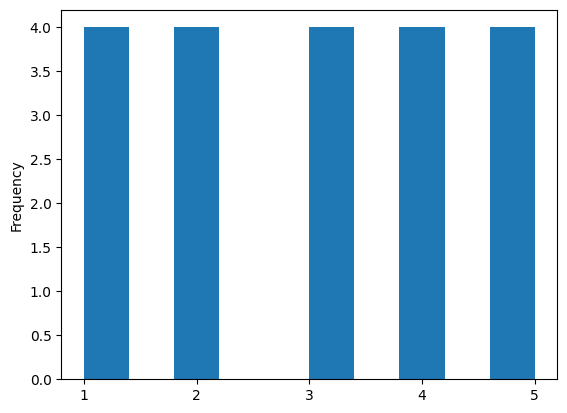

In [13]:
# rating_data_10_users_10_items['userId'].plot(kind='hist',xticks=np.arange(1,600,dtype=int))
rating_data_n_users_n_items['userId'].plot(kind='hist',xticks=np.arange(1,n+1,dtype=int))

### Change value distribution increment for rating from [1->5](increment of 0.5) to [1->10](increment of 1)

In [14]:
# ! maybe later i will change this to reiterate only over the existing values
rating_data_n_users_n_items["rating"].value_counts().axes

[Float64Index([3.0, 2.5, 2.0, 4.0, 4.5, 5.0, 1.5], dtype='float64')]

In [15]:
user_index_dict = {}
index = 0.5
for future_index in range(10):
    user_index_dict[index] = future_index + 1
    index += 0.5

In [16]:
user_index_dict

{0.5: 1,
 1.0: 2,
 1.5: 3,
 2.0: 4,
 2.5: 5,
 3.0: 6,
 3.5: 7,
 4.0: 8,
 4.5: 9,
 5.0: 10}

In [17]:
# ! This migh be changed 
rating_data_n_users_n_items = rating_data_n_users_n_items.replace({"rating":user_index_dict})
rating_data_n_users_n_items

,userId,movieId,rating
10360,5,1,5.0
10361,5,2,5.0
10362,5,3,4.0
10363,5,5,4.0
42114,3,1,9.0
42115,3,2,4.0
42116,3,3,8.0
42117,3,5,4.0
68655,1,1,10.0
68656,1,2,6.0


### Create input for hpf and save it in a npy format

In [18]:
HPF_input_values = rating_data_n_users_n_items.values
HPF_input_values 
input_matrix = np.zeros((n,n))
for row in HPF_input_values:
    userid, movieId, rating = row
    input_matrix[int(userid)-1][int(movieId)-1] = rating

In [19]:
input_matrix_np = np.array(input_matrix,dtype=np.float64)
input_matrix_np

array([[10.,  6.,  6.,  0.,  6.],
       [ 8.,  6.,  6.,  0.,  6.],
       [ 9.,  4.,  8.,  0.,  4.],
       [ 5.,  8.,  0.,  3.,  5.],
       [ 5.,  5.,  4.,  0.,  4.]])

In [130]:
np.save(f"Z:/Master I/PP    - Probabilistic Programming/Project/input/input_{n}x{n}.npy",input_matrix_np)